# Fundamentals of Data Science - Sentiment Analysis on twitter Data

## Import Data set

In [1]:
import pandas as pd
from pprint import pprint
#pd.set_option('display.max_colwidth', -1)

In [2]:
import json
S_DIR = r'C:\Users\ruche\Downloads\geotagged_tweets_20160812-0912.1000.jsons'

tweets_data = []
tweets_file = open(S_DIR, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
# This creates a python list of strings with json data in the string.  

In [3]:
# Print the keys of the dataset collected from one tweet 
# This gives an overview of what information is in the dataset
print(tweets_data[0].keys())

len(tweets_data)
#inspect the keys that may be necessary for sentiment analysis. Essentially the tweet is the most important part

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'entities', 'extended_entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


1000

In [4]:
import re

# A function that extracts the hyperlinks from the tweet's content.
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

# A function that checks whether a word is included in the tweet's content
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [5]:
tweets = pd.DataFrame()

tweets['text'] =    list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] =    list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
tweets['state_full'] = list(map(lambda tweet: tweet['place']['full_name'] if tweet['place'] != None else None, tweets_data))
tweets['state'] = list(map(lambda tweet: tweet['place']['name'] if tweet['place'] != None else None, tweets_data))
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

tweets

,text,lang,country,state_full,state,link
0,@HillaryClinton @POTUS @JudgeJeanine @NBA @NFL...,en,United States,"Evansville, IN",Evansville,https://t.co/UDsJmesa5w
1,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,en,United States,"Nutley, NJ",Nutley,https://t.co/YjYABvQ8pw
2,Attorney's first line of defense to those they...,en,United States,"Oklahoma City, OK",Oklahoma City,
3,@kikesma @norma22flores @EPN @realDonaldTrump ...,es,México,"Villaldama, Nuevo León",Villaldama,
4,Classy.. Better than I expected. But on a se...,en,United States,"Marblehead, MA",Marblehead,https://t.co/jOdETLmkSn
5,@realDonaldTrump I wouldn't even consider it w...,en,United States,"Stevenson Ranch, CA",Stevenson Ranch,
6,Join me again @CNN @ThisHour 11:45am re #Trump...,en,United States,"Washington, DC",Washington,
7,More fraud from soros and Clinton https://t.co...,en,United States,"Los Alamitos, CA",Los Alamitos,https://t.co/cjHD1eqW6U
8,Right! @realDonaldTrump thinks he's special‼️ ...,en,United States,"Washington, USA",Washington,https://t.co/pHMrEcs1Hj
9,@JohnKStahlUSA I want @realDonaldTrump to say ...,en,United States,"Houston, TX",Houston,


## Pre-processing imported tweets

In [6]:
def clean_tweet(tweets):
    list_clean_text = []

    for i in tweets:
        # this removes the hyperlink
        result = re.sub(r"http\S+", "", i)
        # this removes the people the text was directed to e.g. @HillaryClinton or @CNN
        result2 = re.sub(r"\B@\S+.", "", result)
        result3 = re.sub(r"\d+.", "", result2)
        list_clean_text.append(result3)
    return list_clean_text

In [7]:
#Lexicon Normalization
#performing stemming and Lemmatization
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Create a set of stopwords
stop = set(stopwords.words('english'))
stop.update(set(["n", "u", "im"]))

# Create a set of punctuation words 
exclude = set(string.punctuation) 

# This is the function makeing the lemmatization
lemma = WordNetLemmatizer()

# In this function we perform the entire cleaning
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

list_clean_text = clean_tweet(tweets["text"])
tweets["clean_text"] = list_clean_text
# This is the clean corpus.
doc_clean = [clean(doc) for doc in list_clean_text] 

In [8]:
# Tokenize text
from nltk.tokenize import RegexpTokenizer
import html.parser as HTMLParser# In Python 3.4+ import html 
import nltk

# Tokenize each clean text
tokenized_tweets = []
tokenizer = RegexpTokenizer(r'\w+')
for i in doc_clean:
    tokens = tokenizer.tokenize(i)
    tokenized_tweets.append(tokens)

tweets["tokens"] = tokenized_tweets
# flatten the list of lists to combine all words in one list
flattened_list_of_tokens = [y for x in tokenized_tweets for y in x]

In [9]:
# this function extracts features from text
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return (wordlist, word_features)

# view most common features
word_features = get_word_features(flattened_list_of_tokens)

word_features[0].most_common(10)

# Frequency Distribution Plot
import matplotlib.pyplot as plt
word_features[0].plot(30,cumulative=False)
plt.show()

<Figure size 640x480 with 1 Axes>

## Perform sentiment analysis with ntlk tweets dataset

In [10]:
# Import from the nltk corpus twitter dataset
from nltk.corpus import twitter_samples

# extract the positive tweets
pos_tweets = twitter_samples.strings('positive_tweets.json')
len(pos_tweets) # Output: 5000

# extract the negative tweets
neg_tweets = twitter_samples.strings('negative_tweets.json')
len(neg_tweets) # Output: 5000

# print first 5 tweets
#for tweet in pos_tweets[:5]:
#    print(tweet)

5000

In [11]:
# Functions necessary to pre-process the nltk tweets data and return the data in the necessary structure
# A function that extracts which words exist in a text based on a list of words to which we compare.
def word_feats(words):
    return dict([(word, True) for word in words])

# this function takes the cleaned tweets dataset and returns it in the right structure for the naive bayes classifier
def structure_data(doc_clean, sentiment):
    document = []
    for i in doc_clean:
        document.append(i.split())
    features = []
    for i in document:
        features.append((word_feats(i), sentiment))
    return features

In [12]:
negative_campaign_words = ["neverhillary", "nevertrump", "crookedhillary", "crookedtrump", "donthecon", "fraud"
                           "racist", "bigot", "deplorable", "fuckyoudonald", "dumptrump", "hillaryemails", "trumpisunfit"]
positive_campaign_words = ["trump2016", "hillary2016", "imwithher", "imwithhim", "strongertogether"]

In [13]:
# Get the positive features 
cleaned_positive_tweets = clean_tweet(pos_tweets)
pos_doc = [clean(doc) for doc in cleaned_positive_tweets] 
pos_doc_clean =  positive_campaign_words + pos_doc 

pos_feats = structure_data(pos_doc_clean, "pos")

# Get the negative features
cleaned_negative_tweets = clean_tweet(neg_tweets)
neg_doc = [clean(doc) for doc in cleaned_negative_tweets] 
neg_doc_clean =  negative_campaign_words + neg_doc 

neg_feats = structure_data(neg_doc_clean, "neg")

# seperate the data set 75:25 for training:test
neg_cut_off = int(len(neg_feats)*0.80)
pos_cut_off = int(len(pos_feats)*0.80)

In [14]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
# Construct the training dataset containing 50% positive reviews and 50% negative reviews
trainfeats = neg_feats[:neg_cut_off] + pos_feats[:pos_cut_off] 

# Construct the negative dataset containing 50% positive reviews and 50% negative reviews
testfeats = neg_feats[neg_cut_off:] + pos_feats[pos_cut_off:]

print ('train on %d instances, test on %d instances' % (len(trainfeats), len(testfeats)))

# Train a NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(trainfeats)

# Test the trained classifier and display the most informative features.
print ('accuracy:', nltk.classify.util.accuracy(classifier, testfeats))

# See most informative features of the model 
print (classifier.show_most_informative_features(32))

train on 8013 instances, test on 2004 instances
accuracy: 0.7734530938123753
Most Informative Features
                       d = True              pos : neg    =     47.8 : 1.0
                       p = True              pos : neg    =     29.3 : 1.0
                follower = True              pos : neg    =     26.6 : 1.0
                      ff = True              pos : neg    =     26.4 : 1.0
                    sick = True              neg : pos    =     21.0 : 1.0
                     sad = True              neg : pos    =     21.0 : 1.0
               community = True              pos : neg    =     17.7 : 1.0
                    glad = True              pos : neg    =     16.6 : 1.0
                 arrived = True              pos : neg    =     15.9 : 1.0
                     ugh = True              neg : pos    =     15.0 : 1.0
                    miss = True              neg : pos    =     14.5 : 1.0
                 missing = True              neg : pos    =     14.3 : 1

## Testing the model on the tweets dataset

In [15]:
# A list of the classifications
classification = []

# classify each token as positive or negative
for i in tweets["tokens"]:
    classification.append(classifier.classify(word_feats(i)))
    
# make a column of the sentiment/classification of the tweet according to the model
tweets["classification"] = classification
tweets

,text,lang,country,state_full,state,link,clean_text,tokens,classification
0,@HillaryClinton @POTUS @JudgeJeanine @NBA @NFL...,en,United States,"Evansville, IN",Evansville,https://t.co/UDsJmesa5w,There IS A PLAN U PIC ❤️✝👀,"[plan, pic]",pos
1,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,en,United States,"Nutley, NJ",Nutley,https://t.co/YjYABvQ8pw,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,"[brain, nevertrump, buhbyetrump, trumpisunfit]",neg
2,Attorney's first line of defense to those they...,en,United States,"Oklahoma City, OK",Oklahoma City,,Attorney's first line of defense to those they...,"[attorney, first, line, defense, represent, ke...",neg
3,@kikesma @norma22flores @EPN @realDonaldTrump ...,es,México,"Villaldama, Nuevo León",Villaldama,,No lo recibió como presidente,"[lo, recibió, como, presidente]",neg
4,Classy.. Better than I expected. But on a se...,en,United States,"Marblehead, MA",Marblehead,https://t.co/jOdETLmkSn,Classy.. Better than I expected. But on a se...,"[classy, better, expected, serious, note, woul...",neg
5,@realDonaldTrump I wouldn't even consider it w...,en,United States,"Stevenson Ranch, CA",Stevenson Ranch,,I wouldn't even consider it when it is a conso...,"[even, consider, consolation, dinner, you]",neg
6,Join me again @CNN @ThisHour 11:45am re #Trump...,en,United States,"Washington, DC",Washington,,"Join me again m re #Trump's dumb ""bigot"" comme...","[join, trump, dumb, bigot, comment, projecting...",pos
7,More fraud from soros and Clinton https://t.co...,en,United States,"Los Alamitos, CA",Los Alamitos,https://t.co/cjHD1eqW6U,More fraud from soros and Clinton,"[fraud, soros, clinton]",pos
8,Right! @realDonaldTrump thinks he's special‼️ ...,en,United States,"Washington, USA",Washington,https://t.co/pHMrEcs1Hj,Right! thinks he's special‼️,"[right, think, he, special]",pos
9,@JohnKStahlUSA I want @realDonaldTrump to say ...,en,United States,"Houston, TX",Houston,,I want to say that he will prosecute her and a...,"[want, say, prosecute, crime, usa, including, ...",neg


## Perform sentiment analysis with textblob

In [16]:
from textblob import TextBlob as tb

tweets['sentiment'] = tweets['tokens'].apply(lambda x: tb(" ".join(x)).sentiment[0] )
#tweets[['text','calc_sentiment']]

tweets

,text,lang,country,state_full,state,link,clean_text,tokens,classification,sentiment
0,@HillaryClinton @POTUS @JudgeJeanine @NBA @NFL...,en,United States,"Evansville, IN",Evansville,https://t.co/UDsJmesa5w,There IS A PLAN U PIC ❤️✝👀,"[plan, pic]",pos,0.000000
1,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,en,United States,"Nutley, NJ",Nutley,https://t.co/YjYABvQ8pw,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,"[brain, nevertrump, buhbyetrump, trumpisunfit]",neg,0.000000
2,Attorney's first line of defense to those they...,en,United States,"Oklahoma City, OK",Oklahoma City,,Attorney's first line of defense to those they...,"[attorney, first, line, defense, represent, ke...",neg,0.250000
3,@kikesma @norma22flores @EPN @realDonaldTrump ...,es,México,"Villaldama, Nuevo León",Villaldama,,No lo recibió como presidente,"[lo, recibió, como, presidente]",neg,0.000000
4,Classy.. Better than I expected. But on a se...,en,United States,"Marblehead, MA",Marblehead,https://t.co/jOdETLmkSn,Classy.. Better than I expected. But on a se...,"[classy, better, expected, serious, note, woul...",neg,-0.086667
5,@realDonaldTrump I wouldn't even consider it w...,en,United States,"Stevenson Ranch, CA",Stevenson Ranch,,I wouldn't even consider it when it is a conso...,"[even, consider, consolation, dinner, you]",neg,0.000000
6,Join me again @CNN @ThisHour 11:45am re #Trump...,en,United States,"Washington, DC",Washington,,"Join me again m re #Trump's dumb ""bigot"" comme...","[join, trump, dumb, bigot, comment, projecting...",pos,-0.187500
7,More fraud from soros and Clinton https://t.co...,en,United States,"Los Alamitos, CA",Los Alamitos,https://t.co/cjHD1eqW6U,More fraud from soros and Clinton,"[fraud, soros, clinton]",pos,0.000000
8,Right! @realDonaldTrump thinks he's special‼️ ...,en,United States,"Washington, USA",Washington,https://t.co/pHMrEcs1Hj,Right! thinks he's special‼️,"[right, think, he, special]",pos,0.321429
9,@JohnKStahlUSA I want @realDonaldTrump to say ...,en,United States,"Houston, TX",Houston,,I want to say that he will prosecute her and a...,"[want, say, prosecute, crime, usa, including, ...",neg,0.000000


In [17]:
# compare the model from nltk with textblob
index = 0
counter_different_classif = 0
counter_neutral = 0
counter_pos = 0
comparison = []

for classification in tweets["classification"]:
   # print(tweets["sentiment"][index])
    if classification == "neg" and tweets["sentiment"][index] < 0:
        comparison.append("same negative")
    elif classification == "neg" and tweets["sentiment"][index] > 0:
        comparison.append("different neg : pos")
        counter_pos = counter_pos + 1
        counter_different_classif = counter_different_classif + 1
    elif classification == "pos" and tweets["sentiment"][index] > 0:
        comparison.append("same positive")
        counter_pos = counter_pos + 1
    elif classification == "pos" and tweets["sentiment"][index] < 0:
        comparison.append("different pos : neg")
        counter_different_classif = counter_different_classif + 1
    else:
        comparison.append("different neutral")
        counter_neutral = counter_neutral + 1
    index = index + 1
# this column contains the comparisons, same negative means that both models classified as negative, idem for same positive
# different neutral means that textblob classified as neutral 
# different neg : pos means that naive bayes negative and textblob was positive 
# different pos : neg means that naive bayes positive and textblob was negative 
tweets["comparison"] = comparison

# summary of the comparison
print(f"Out of {len(tweets)} tweets, the models had a different classification {counter_different_classif} times")
print(f"Out of {len(tweets)} tweets, textblob found {counter_neutral} neutral tweets, {counter_pos} positive tweets and {len(tweets) - (counter_neutral + counter_pos)} ")
tweets.groupby(["classification"]).count()

Out of 1000 tweets, the models had a different classification 179 times
Out of 1000 tweets, textblob found 534 neutral tweets, 268 positive tweets and 198 


,text,lang,country,state_full,state,link,clean_text,tokens,sentiment,comparison
classification,,,,,,,,,,
neg,545,545,545,545,545,545,545,545,545,545
pos,455,455,455,455,455,455,455,455,455,455


In [18]:
pos_words = []
neg_words = []
index = 0
for i in tweets["classification"]:
    if i == "pos":
        pos_words.append(tweets["tokens"][index])
    else:
        neg_words.append(tweets["tokens"][index])
    index = index + 1

def flatten(a_list):
    flattened_list = [y for x in a_list for y in x]
    return flattened_list

all_pos_words = flatten(pos_words)
all_neg_words = flatten(neg_words)

In [30]:
from wordcloud import WordCloud

def word_cloud(tweets):
    #We generate the wordcloud using the series created and the mask 
    word_cloud = WordCloud(width=2000, height=1000, max_font_size=500, max_words=100).generate(tweets)

    # plot the wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation="hermite")
    plt.axis("off")    
    plt.show() 

## Positive

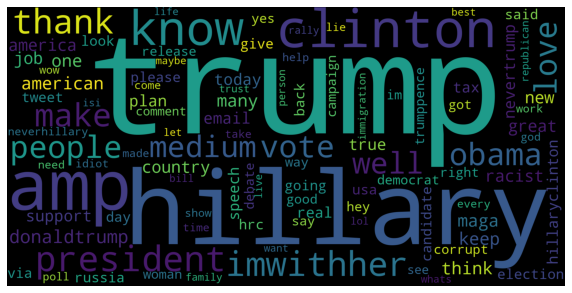

In [31]:
word_cloud(" ".join(all_pos_words))

## Negative

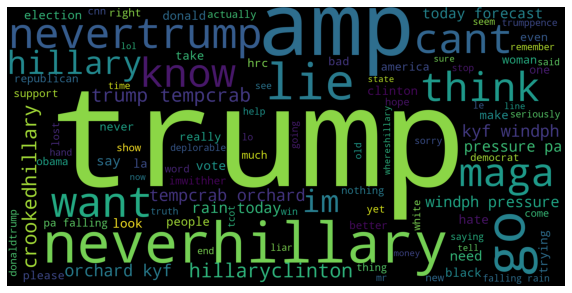

In [32]:
word_cloud(" ".join(all_neg_words))

## Sentiment Per State

In [28]:
# groupby state

# assign a number to positive or negative
classification_num = []
for i in tweets["classification"]:
    if i == "pos":
        classification_num.append(1)
    else:
        classification_num.append(-1)
        
# column with the mean positive (1) or negative (-1) number per state
tweets["classification_num"] = classification_num
tweets.groupby(["state"]).mean()

,sentiment,classification_num
state,,
73rd & Central Park West,-0.025000,1.000000
Abingdon,-1.000000,-1.000000
Acacia Villas,0.000000,0.000000
Acworth,-0.145833,-1.000000
Alabama,-0.300000,0.000000
Alafaya,0.150000,0.000000
Albuquerque,0.225000,1.000000
Allen,0.700000,1.000000
Amelia,-0.333333,1.000000
